In [5]:
#IMPORTING LIBRARIES
from textblob import TextBlob
import sys,tweepy
import matplotlib.pyplot as plt

In [6]:
#FUNCTION TO CALCULATE PERCENTAGE
def percentage(a, b):
    return (float(a) / float(b))*100

In [7]:
#FUNCTION TO PLOT PIE CHART
def plotPieChart(positive,negative,neutral,searchTerm,noOfSearchTerms):
    labels = ['Positive [' + str(positive) + '%]','Neutral [' + str(neutral) + '%]','Negative [' + str(negative) + '%]']
    sizes = [positive,neutral,negative]
    colors = ['red','blue','darkgreen']
    patches, texts = plt.pie(sizes, colors=colors, startangle=90)
    plt.legend(patches, labels, loc="best")
    plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(noOfSearchTerms) + ' Tweets.')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

How people are reacting on ego by analyzing 5 tweets.

General Report: 
Polarity Equals : 0.10333333333333335
Positive

Detailed Report: 
40.00% people thought it was positive
20.00% people thought it was negative
40.00% people thought it was neutral


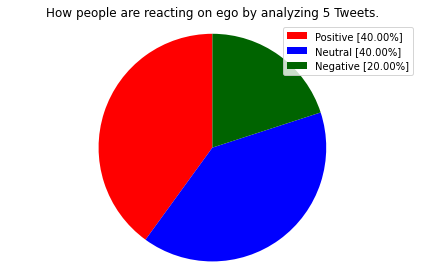

In [8]:
#AUTHENTICATING
consumerKey = 'XHZllKxVWpCaxCtcrDngODL4s'
consumerSecret = 'VmUThxRaspQOxH9lPAJfxF4aZdHCje62vxR7APDGnvAMgtMNd4'
accessToken = '1405919912724365314-ArZp2klgtvksnGKKInuI3XsqMUdMUY'
accessTokenSecret = '0kxV6woT2sQnaIhRtMt5oyCi57aZAv4O7DhXJwzY4CemM'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

#INPUT FOR TERM TO BE SEARCHED
searchTerm = input("Enter Keyword/Tag to search about: ")

#HOW MANY TWEETS TO SEARCHED
NoOfTerms = int(input("Enter how many tweets to search: "))

#SEARCHING FOR TWEETS
tweets = tweepy.Cursor(api.search, q=searchTerm, lang = "en").items(NoOfTerms)

#CREATING VARIABLES TO STORE INFORMATION
polarity=0;
positive=0;
negative=0;
neutral=0;

#ITERATING THROUGH TWEETS FETCHED
for tweet in tweets:
    analysis = TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity
    if (analysis.sentiment.polarity == 0): 
        neutral += 1
    elif (analysis.sentiment.polarity >0.00):
        positive += 1
    elif (analysis.sentiment.polarity <0.00):
        negative += 1

#FINDING AVERAGE OF HOW PEOPLE ARE REACTING
positive = percentage(positive, NoOfTerms)
negative = percentage(negative, NoOfTerms)
neutral = percentage(neutral, NoOfTerms)

#FINDING AVERAGE REACTION
polarity= polarity/NoOfTerms

#FORMATING IT TO TWO DECIMAL PLACES
positive=format(positive, '.2f')
negative=format(negative, '.2f')
neutral=format(neutral, '.2f')

#PRINTS THE OVERALL RESULT
print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")
print()
print("General Report: ")
print("Polarity Equals : "+str(polarity))

if (polarity == 0.00):
    print("Neutral")
elif (polarity > 0.00):
    print("Positive")
elif (polarity < 0.00):
    print("Negative")

print()

#PRINTS THE PERCENTAGE OF POSITIVE,NEGATIVE AND NEUTRAL TWEETS
print("Detailed Report: ")
print(str(positive) + "% people thought it was positive")
print(str(negative) + "% people thought it was negative")
print(str(neutral) + "% people thought it was neutral")

#CALLING plotpieChart FUNCTION
plotPieChart(positive,negative,neutral,searchTerm,NoOfTerms)